In [22]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [17]:
# Load the inventory datasets
inventory_df = pd.read_excel('New Inventory.xlsx')
receive_df = pd.read_excel('Inventory Dataset.xlsx')



In [18]:
inventory_df.head()

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000


In [19]:
receive_df.head()

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399


In [33]:
# Load the inventory datasets
inventory_df = pd.read_excel('New Inventory.xlsx')
receive_df = pd.read_excel('Inventory Dataset.xlsx')

# Merge the two datasets on 'Item Number'
merged_df = pd.merge(inventory_df, receive_df, on='Item Number', how='outer')

# Combine 'Date' and 'Inventory Receive date' columns into one date column
merged_df['Date'] = merged_df.apply(lambda row: row['Date'] if pd.notnull(row['Date']) else row['Inventory Receive'], axis=1)

# Fill missing values in 'Inventory' and 'Total Item Qty' columns with 0
merged_df['Inventory'].fillna(0, inplace=True)
merged_df['Total Item Qty'].fillna(0, inplace=True)

In [37]:
merged_df.head()

,Item Number,Inventory Receive,Total Item Qty,Date,Inventory
0,064-13-0002,2023-07-07,700.0,2023-06-17,9599.0
1,064-13-0002,2023-07-10,728.0,2023-06-17,9599.0
2,064-13-0002,2023-09-29,500.0,2023-06-17,9599.0
3,064-13-0002,2023-08-16,1120.0,2023-06-17,9599.0
4,064-13-0338,2023-07-07,1700.0,2023-06-17,6234.0


In [38]:
# Pivot the table to get 'Item Number' as index, 'Date' as columns, and 'Inventory' as values
pivot_table = merged_df.pivot_table(index='Item Number', columns='Date', values='Inventory', aggfunc='sum', fill_value=0)

# Convert the date columns to datetime objects
pivot_table.columns = pd.to_datetime(pivot_table.columns)

# Generate weekly date columns starting from the maximum date in the original 'Date' column
max_date = max(merged_df['Date'])
weekly_dates = [max_date + timedelta(days=7 * i) for i in range(1, 12)]

# Add the weekly date columns to the pivot table
for date in weekly_dates:
    pivot_table[date] = 0
    
# Sort the columns by date
pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1)

# Iterate through rows and fill in the inventory levels for each item on a weekly basis
for item_number, row in pivot_table.iterrows():
    current_inventory = row.iloc[0]
    for i, receive_date in enumerate(row.index[1:], start=1):
        if i <= len(weekly_dates):
            weekly_date = weekly_dates[i - 1]
            filtered_data = merged_df[(merged_df['Item Number'] == item_number) & (merged_df['Date'] == receive_date)]
            total_item_qty = filtered_data['Total Item Qty']
            if not total_item_qty.empty:
                current_inventory += total_item_qty.values[0]
            pivot_table.at[item_number, weekly_date] = current_inventory


In [39]:
pivot_table

Date,2023-06-17,2023-08-04,2023-08-16,2023-09-08,2023-09-15,2023-09-22,2023-09-24,2023-09-29,2023-10-08,2023-10-13,...,2023-12-29,2024-01-05,2024-01-12,2024-01-19,2024-01-26,2024-02-02,2024-02-09,2024-02-16,2024-02-23,2024-03-01
Item Number,,,,,,,,,,,,,,,,,,,,,
064-01-0003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5488,5488,7352,7352,7352
064-01-0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7380,7380,9900,9900,9900
064-01-0006,10,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
064-01-0012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6840,6840,10084,10084,10084
064-01-0013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6300,6300,8048,8048,8048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,12419,0,0,0,0,0,0,0,0,0,...,12419,12419,12419,12419,12419,12419,12419,12419,12419,12419
064-18-9904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
064-18-9909,12,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


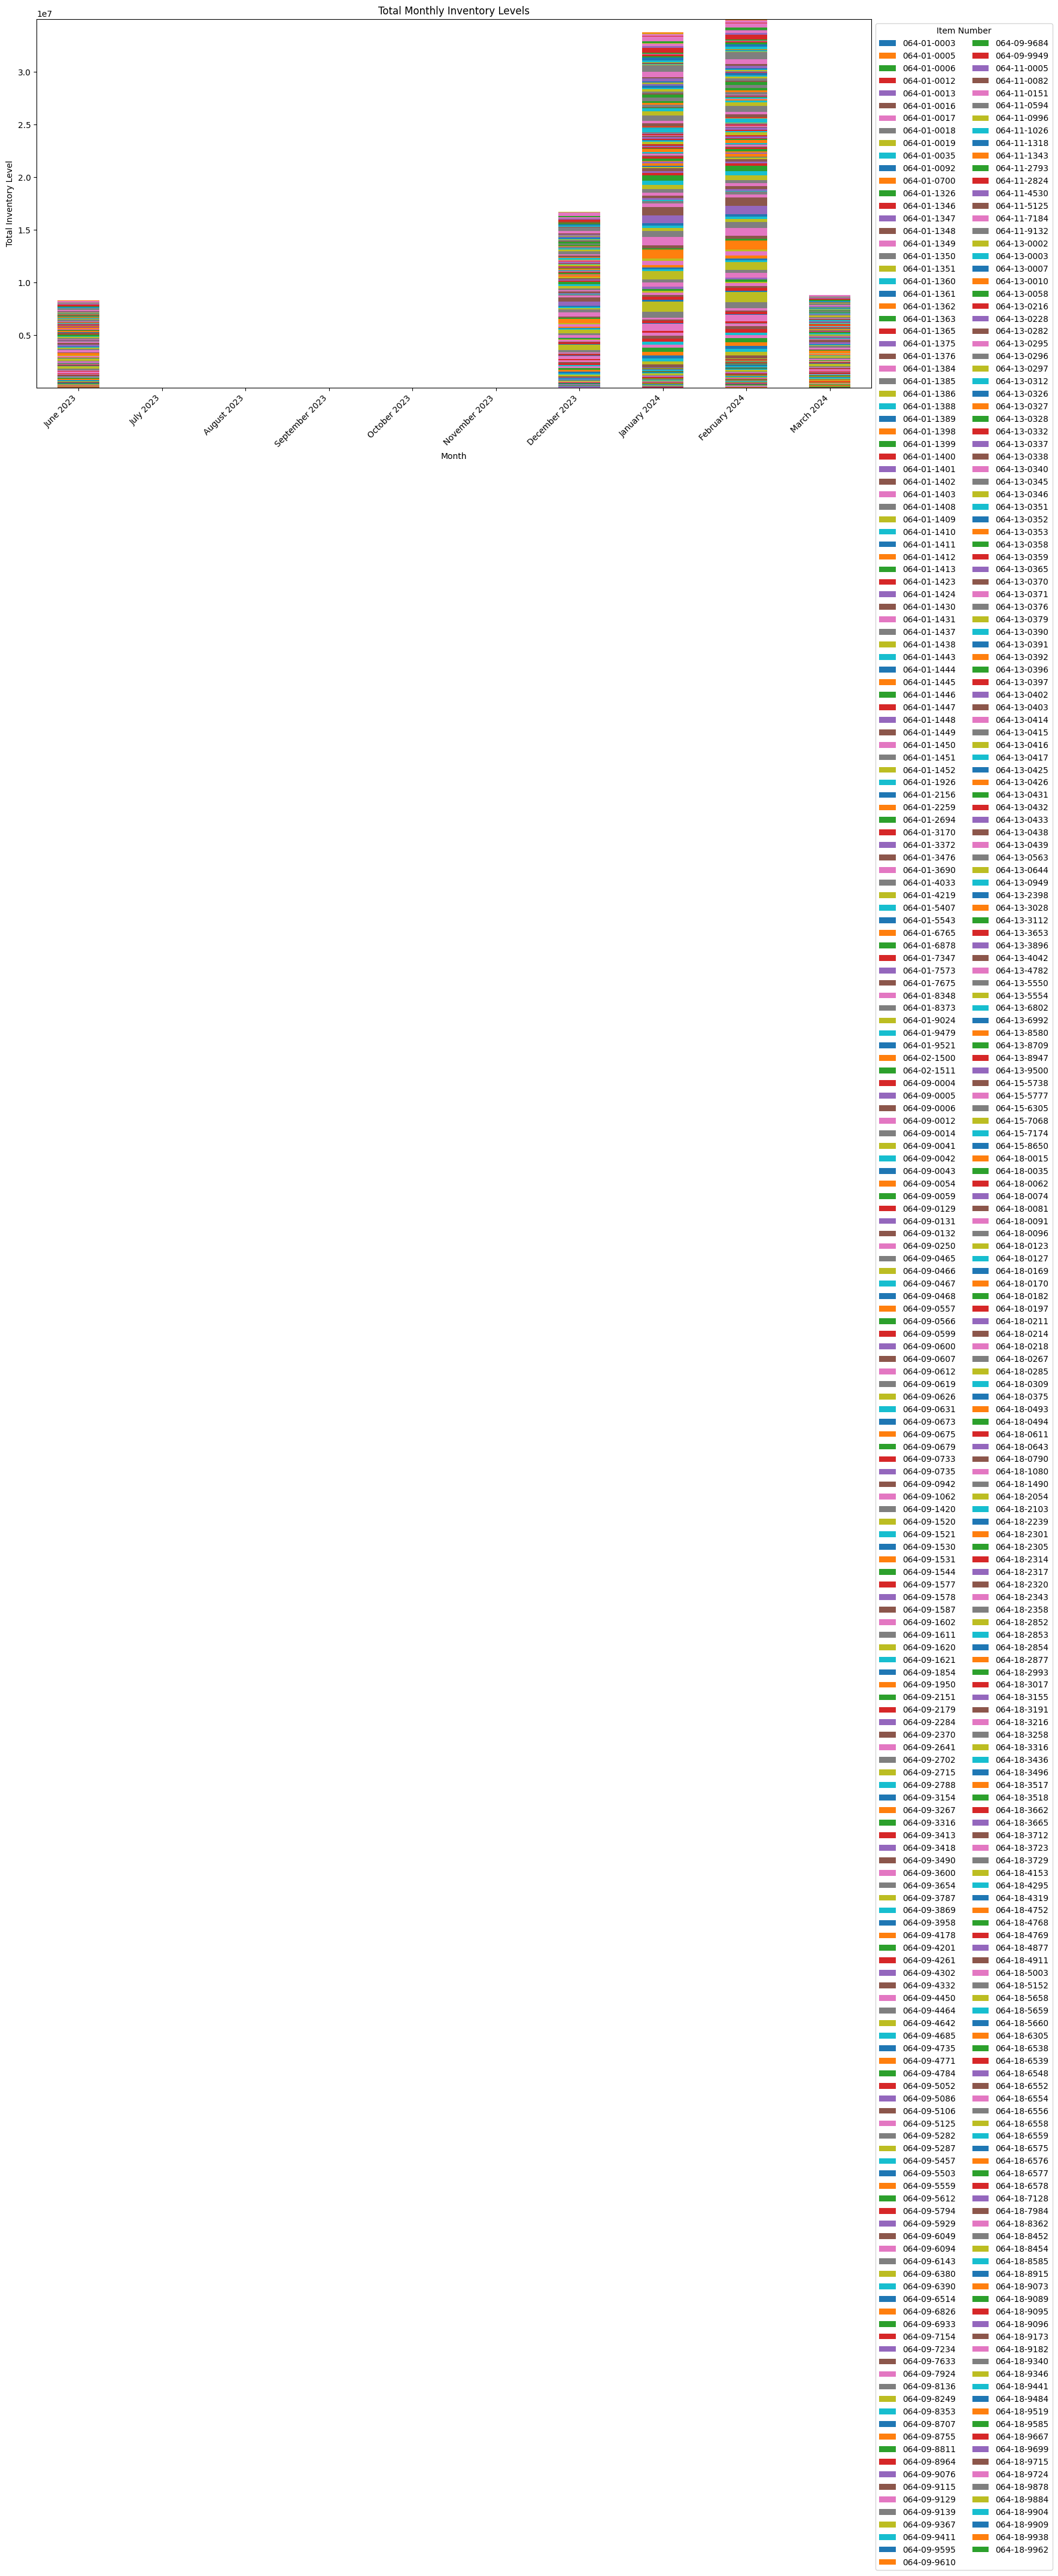

In [40]:
# Create a bar chart showing total monthly inventory levels
monthly_totals = pivot_table.resample('M', axis=1).sum()
monthly_totals = monthly_totals.rename(columns=lambda x: x.strftime('%B %Y'))

# Plot the bar chart with larger figsize and rotation for x-axis labels
ax = monthly_totals.T.plot(kind='bar', stacked=True, figsize=(18, 8))
ax.set_xlabel('Month')
ax.set_ylabel('Total Inventory Level')
ax.set_title('Total Monthly Inventory Levels')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Item Number', ncol=2)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()